In [113]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
mytrain = pd.read_csv("train_qnU1GcL.csv")

In [115]:
mytest=pd.read_csv("test_LxCaReE_DvdCKVT_gimWwKr.csv")

In [116]:
mytrain.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [117]:
mytrain.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [118]:
mytrain.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [119]:
mytest.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [120]:
mytrain.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [121]:
mytrain['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

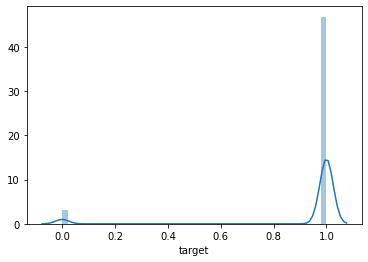

In [122]:
sn.distplot(mytrain["target"])

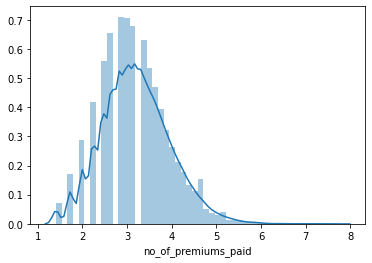

In [123]:
sn.distplot(np.sqrt(mytrain["no_of_premiums_paid"]))

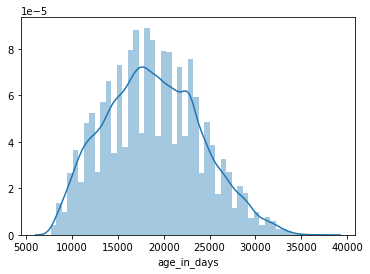

In [124]:
sn.distplot(mytrain["age_in_days"])

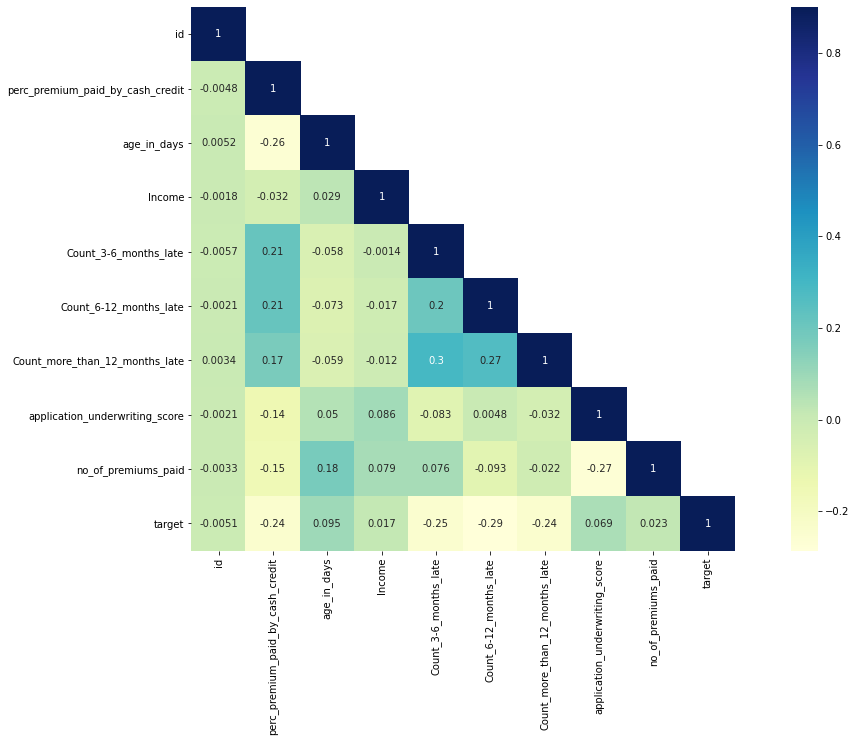

In [125]:
# looking at the correlation between numerical variables
corr = mytrain[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [126]:
mytrain.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [127]:
mytrain.fillna(0,inplace=True)

In [128]:
mytrain.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

CHECK

In [129]:
mytest.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [130]:
mytest.fillna(0,inplace=True)

In [131]:
mytest.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logreg=LogisticRegression()

In [134]:
mytrain=mytrain.drop('sourcing_channel',1)

In [135]:
mytrain=mytrain.drop('residence_area_type',1)

In [136]:
X_train =mytrain[mytrain['age_in_days']<=28000]

In [137]:
valid = mytrain[mytrain['age_in_days']>28000]

In [138]:
X_train = mytrain.drop('target',1)


In [139]:
y_train = mytrain['target']

In [140]:
X_val = valid.drop('target',1)
y_val = valid['target']

In [141]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79853, 9), (79853,), (3927, 9), (3927,))

In [142]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [143]:
prediction = logreg.predict(X_val)

In [144]:
prediction.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((3927,), (79853, 9), (79853,), (3927, 9), (3927,))

In [145]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [146]:
rmsle(y_val,prediction)

0.1043494138107556

In [147]:
logreg.score(X_train,y_train)

0.937409990858202

In [148]:

from sklearn.tree import DecisionTreeRegressor

In [149]:
dt_reg = DecisionTreeRegressor(max_depth=7)

In [150]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [151]:
predict = dt_reg.predict(X_val)

In [152]:
rmsle(y_val, predict)

0.09190389049150408

In [153]:
mytest=mytest.drop('sourcing_channel',1)

In [154]:
mytest=mytest.drop('residence_area_type',1)

In [155]:
test_prediction = dt_reg.predict(mytest)

In [156]:
i=mytest['id']

In [157]:
submission = pd.DataFrame()

In [158]:
submission['id']= i
submission['target'] = test_prediction

In [159]:
submission.to_csv('submission9.csv', header=True, index=False)